In [1]:
#Step 1: Import required packages into Jupyter notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.decomposition import PCA
from statsmodels import multivariate
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo

In [2]:
#Step 2: Upload data into Jupyter notebook using csv file
places = pd.read_csv ('places_data.csv')
#print the number of rows and columns
places.shape
(329, 11)

(329, 11)

In [3]:
#Glimpse of the first 6 rows of the data
places.head(6)

,Names,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Pop
0,"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633,110932
1,"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350,660328
2,"Albany,GA",468,7339,618,970,2531,2560,237,859,5250,112402
3,"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864,835880
4,"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727,419700
5,"Alexandria,LA",520,5819,640,727,2444,2972,334,1018,5254,135282


In [4]:
#Collect the names of metro areas separately and view the first 6 names
names=places['Names']
names.head(6)

0                    Abilene,TX
1                      Akron,OH
2                     Albany,GA
3    Albany-Schenectady-Troy,NY
4                Albuquerque,NM
5                 Alexandria,LA
Name: Names, dtype: object

In [5]:
# Delete the first column containing names from the dataset
places = places.drop('Names',axis = 1)

In [6]:
#Find the arithmetic average of the variables
pd.DataFrame(round(places.mean(),2)).T

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Pop
0,538.73,8346.56,1185.74,961.05,4210.08,2814.89,3150.88,1845.96,5525.36,522118.45


In [7]:
#Find variance covariance matrix
np.round(places.cov(),2)

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Pop
Climate,14594.64,1.113133e+05,2.584607e+04,8.300970e+03,1.387087e+04,2.500430e+03,1.272931e+05,2.083839e+04,-13112.12,2.640792e+07
HousingCost,111313.31,5.689478e+06,1.083791e+06,1.143443e+05,9.412409e+05,1.514541e+05,4.967020e+06,8.137604e+05,696953.13,6.952693e+08
HlthCare,25846.07,1.083791e+06,1.006013e+06,1.091370e+05,6.845633e+05,1.577357e+05,4.031337e+06,2.636735e+05,75347.45,7.414970e+08
Crime,8300.97,1.143443e+05,1.091370e+05,1.275591e+05,1.485321e+05,8.526060e+03,6.457665e+05,9.943876e+04,100701.79,1.316833e+08
Transp,13870.87,9.412409e+05,6.845633e+05,1.485321e+05,2.105921e+06,1.564139e+05,3.131296e+06,4.275899e+05,93240.06,5.214190e+08
Educ,2500.43,1.514541e+05,1.577357e+05,8.526060e+03,1.564139e+05,1.029081e+05,5.558915e+05,2.016489e+04,41642.54,1.029451e+08
Arts,127293.08,4.967020e+06,4.031337e+06,6.457665e+05,3.131296e+06,5.558915e+05,2.155080e+07,1.420142e+06,380970.47,3.684693e+09
Recreat,20838.39,8.137604e+05,2.636735e+05,9.943876e+04,4.275899e+05,2.016489e+04,1.420142e+06,6.526833e+05,152035.16,2.669586e+08
Econ,-13112.12,6.969531e+05,7.534745e+04,1.007018e+05,9.324006e+04,4.164254e+04,3.809705e+05,1.520352e+05,1176071.98,5.789273e+07
Pop,26407923.21,6.952693e+08,7.414970e+08,1.316833e+08,5.214190e+08,1.029451e+08,3.684693e+09,2.669586e+08,57892734.26,7.980254e+11


In [8]:
# Normalize the variables and then view the first 6 rows
std_places = pd.DataFrame(zscore(places,ddof=1),columns=places.columns)
np.round(std_places.head(6),2)

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Pop
0,-0.15,-0.90,-0.95,-0.11,-0.12,-0.18,-0.46,-0.55,1.94,-0.46
1,0.30,-0.09,0.47,-0.21,0.46,-1.17,0.52,0.97,-1.08,0.15
2,-0.59,-0.42,-0.57,0.03,-1.16,-0.79,-0.63,-1.22,-0.25,-0.46
3,-0.52,-0.18,0.24,-0.98,1.84,1.82,0.32,-0.28,0.31,0.35
4,1.00,0.02,0.67,1.46,1.62,0.66,0.29,0.95,0.19,-0.11
5,-0.16,-1.06,-0.54,-0.66,-1.22,0.49,-0.61,-1.02,-0.25,-0.43


In [9]:
# Find new variance-covariance matrix of the transformed variables
np.round(std_places.cov(),2)

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Pop
Climate,1.00,0.39,0.21,0.19,0.08,0.06,0.23,0.21,-0.10,0.24
HousingCost,0.39,1.00,0.45,0.13,0.27,0.20,0.45,0.42,0.27,0.33
HlthCare,0.21,0.45,1.00,0.30,0.47,0.49,0.87,0.33,0.07,0.83
Crime,0.19,0.13,0.30,1.00,0.29,0.07,0.39,0.34,0.26,0.41
Transp,0.08,0.27,0.47,0.29,1.00,0.34,0.46,0.36,0.06,0.40
Educ,0.06,0.20,0.49,0.07,0.34,1.00,0.37,0.08,0.12,0.36
Arts,0.23,0.45,0.87,0.39,0.46,0.37,1.00,0.38,0.08,0.89
Recreat,0.21,0.42,0.33,0.34,0.36,0.08,0.38,1.00,0.17,0.37
Econ,-0.10,0.27,0.07,0.26,0.06,0.12,0.08,0.17,1.00,0.06
Pop,0.24,0.33,0.83,0.41,0.40,0.36,0.89,0.37,0.06,1.00


In [11]:
#Scatterplots of all possible variable pairs
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)
    g = sns.pairplot(std_places)
    g.map_diag(hide_current_axis)

In [12]:
# Principal Component Extraction using sklearn.decomposition package
pca = PCA(n_components= 10)
pca.fit_transform(std_places)
pc_comps = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
prop_var = np.round(pca.explained_variance_ratio_,2)
std_dev = np.round(np.sqrt(pca.explained_variance_),2)
cum_var = np.round(np.cumsum(pca.explained_variance_ratio_),2)
temp = pd.DataFrame(pc_comps,columns=['PCs'])
temp['Proportion Of Variance'] = prop_var
temp['Standard Deviation'] = std_dev
temp['Cumulative Proportion'] = cum_var
temp

,PCs,Proportion Of Variance,Standard Deviation,Cumulative Proportion
0,PC1,0.41,2.02,0.41
1,PC2,0.13,1.12,0.54
2,PC3,0.11,1.07,0.65
3,PC4,0.10,0.98,0.74
4,PC5,0.08,0.89,0.82
5,PC6,0.07,0.83,0.89
6,PC7,0.05,0.70,0.94
7,PC8,0.03,0.59,0.98
8,PC9,0.01,0.37,0.99
9,PC10,0.01,0.31,1.00


Text(0, 0.5, 'Proportion of variance explained')

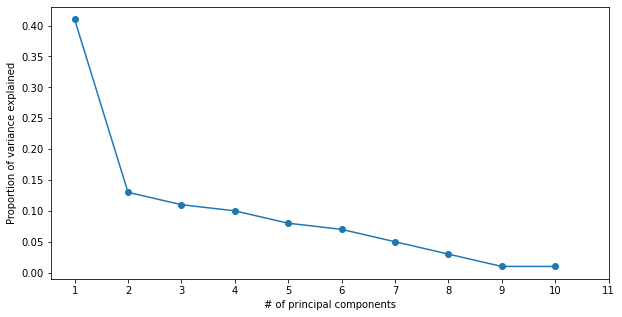

In [13]:
# Obtain the screeplot
plt.figure(figsize=(10,5))
plt.plot(temp['Proportion Of Variance'],marker = 'o')
plt.xticks(np.arange(0,11),labels=np.arange(1,12))
plt.xlabel('# of principal components')
plt.ylabel('Proportion of variance explained')

In [14]:
# Print first 5 PCs
pc_df_pcafunc = pd.DataFrame(np.round(pca.components_,2),index=pc_comps,columns=std_places.columns)
pc_df_pcafunc.head(5)

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Pop
PC1,0.18,0.30,0.44,0.25,0.30,0.25,0.45,0.28,0.10,0.43
PC2,-0.21,-0.34,0.26,-0.33,0.08,0.36,0.18,-0.42,-0.53,0.20
PC3,0.70,0.21,-0.01,-0.16,-0.17,-0.27,0.02,0.07,-0.58,0.02
PC4,0.14,0.52,0.05,-0.58,-0.09,0.46,-0.10,-0.13,0.29,-0.20
PC5,0.22,-0.07,0.13,0.26,-0.67,0.01,0.16,-0.50,0.30,0.24


In [16]:
# Find PC scores
pc = pca.fit_transform(std_places)
pca_df = pd.DataFrame(pc,columns=pc_comps)
np.round(pca_df.iloc[:6,:5],2)

,PC1,PC2,PC3,PC4,PC5
0,-1.18,-0.92,-1.38,0.23,0.64
1,0.49,0.06,1.17,-0.97,-0.94
2,-1.86,0.17,-0.04,-0.36,0.93
3,0.97,1.45,-1.24,1.12,-1.17
4,1.87,-0.63,-0.03,-0.59,-0.79
5,-1.77,0.91,-0.10,0.32,0.85


In [17]:
round(pca_df.corr(),2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
PC1,1.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
PC2,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0
PC3,0.0,-0.0,1.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
PC4,0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
PC5,0.0,-0.0,0.0,-0.0,1.0,0.0,0.0,0.0,0.0,-0.0
PC6,-0.0,-0.0,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,-0.0
PC7,-0.0,0.0,0.0,-0.0,0.0,0.0,1.0,0.0,-0.0,-0.0
PC8,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,0.0
PC9,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,0.0
PC10,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,1.0


In [18]:
result = pd.concat((std_places,pca_df),axis = 1).corr()
np.round(result.iloc[0:10,10:15],2)

,PC1,PC2,PC3,PC4,PC5
Climate,0.36,-0.24,0.75,0.13,0.19
HousingCost,0.60,-0.38,0.22,0.51,-0.06
HlthCare,0.88,0.29,-0.01,0.05,0.11
Crime,0.51,-0.37,-0.17,-0.57,0.23
Transp,0.62,0.09,-0.18,-0.09,-0.59
Educ,0.50,0.40,-0.29,0.45,0.01
Arts,0.90,0.20,0.02,-0.10,0.14
Recreat,0.57,-0.47,0.07,-0.13,-0.44
Econ,0.21,-0.59,-0.62,0.28,0.27
Pop,0.87,0.23,0.02,-0.19,0.21


In [19]:
# Extraction of PCA with statsmodels.multivariate.pca package
pc = multivariate.pca.PCA(std_places,method='eig')
cum_var = np.round(pc.rsquare[1:],2)
cum_var.reset_index(drop=True,inplace = True)
var_exp = np.round(pc.eigenvals/np.sum(pc.eigenvals),2)
measure_df = pd.DataFrame(pc_comps,columns=['PCs'])
measure_df['Cumulative Proportion'] = cum_var
measure_df['Proportion of Variance'] = var_exp
measure_df

,PCs,Cumulative Proportion,Proportion of Variance
0,PC1,0.41,0.41
1,PC2,0.54,0.13
2,PC3,0.65,0.11
3,PC4,0.74,0.10
4,PC5,0.82,0.08
5,PC6,0.89,0.07
6,PC7,0.94,0.05
7,PC8,0.98,0.03
8,PC9,0.99,0.01
9,PC10,1.00,0.01


Text(0, 0.5, 'Proportion of variance explained')

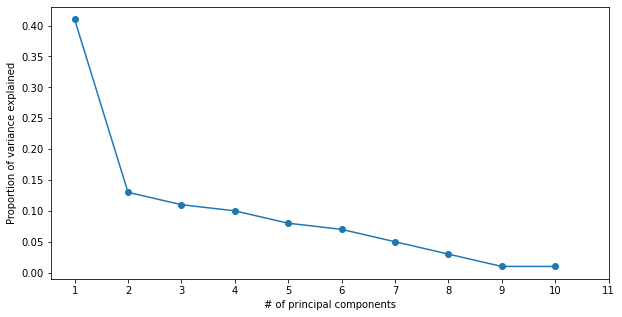

In [20]:
# Obtain the screeplot
plt.figure(figsize=(10,5))
plt.plot(measure_df['Proportion of Variance'],marker = 'o')
plt.xticks(np.arange(0,11),labels=np.arange(1,12))
plt.xlabel('# of principal components')
plt.ylabel('Proportion of variance explained')

In [21]:
# Coefficients of PCA
loadings = pd.DataFrame(np.round(pc.loadings,2))
loadings.iloc[:,:5]

,comp_0,comp_1,comp_2,comp_3,comp_4
Climate,-0.18,0.21,0.70,-0.14,-0.22
HousingCost,-0.30,0.34,0.21,-0.52,0.07
HlthCare,-0.44,-0.26,-0.01,-0.05,-0.13
Crime,-0.25,0.33,-0.16,0.58,-0.26
Transp,-0.30,-0.08,-0.17,0.09,0.67
Educ,-0.25,-0.36,-0.27,-0.46,-0.01
Arts,-0.45,-0.18,0.02,0.10,-0.16
Recreat,-0.28,0.42,0.07,0.13,0.50
Econ,-0.10,0.53,-0.58,-0.29,-0.30
Pop,-0.43,-0.20,0.02,0.20,-0.24


In [23]:
# KMO Test
print("Overall MSA :",np.round(calculate_kmo(std_places)[1],2))


Overall MSA : 0.76


In [24]:
msa = np.round(calculate_kmo(std_places)[0],2)
pd.DataFrame(msa,index=std_places.columns,columns=['MSA']).T

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Pop
MSA,0.56,0.64,0.85,0.74,0.86,0.79,0.8,0.82,0.39,0.79


In [25]:
# Bartlett test
chi_square_value,p_value=calculate_bartlett_sphericity(std_places)
print('Chi-squared value :',chi_square_value)
print('P-value :',p_value)

Chi-squared value : 1629.980502772568
P-value : 9.2446407534e-313


In [26]:
# Extract 5 Factors
fa = FactorAnalyzer(n_factors=5, rotation=None,method='principal')
factor_no_rotation= fa.fit(std_places)
fa_components= pd.DataFrame(np.round(fa.loadings_,2),columns= ['pc1', 'pc2','pc3','pc4','pc5'] ,index = std_places.columns)
fa_components['h2'] = np.round(fa.get_communalities(),2)
fa_components['u2'] = np.round(fa.get_uniquenesses(),2)
fa_components

,pc1,pc2,pc3,pc4,pc5,h2,u2
Climate,0.36,0.24,-0.75,0.13,0.19,0.80,0.20
HousingCost,0.60,0.38,-0.22,0.51,-0.06,0.82,0.18
HlthCare,0.88,-0.29,0.01,0.05,0.11,0.88,0.12
Crime,0.51,0.37,0.17,-0.57,0.23,0.81,0.19
Transp,0.62,-0.09,0.18,-0.09,-0.59,0.78,0.22
Educ,0.50,-0.40,0.29,0.45,0.01,0.69,0.31
Arts,0.90,-0.20,-0.02,-0.10,0.14,0.88,0.12
Recreat,0.57,0.47,-0.07,-0.13,-0.44,0.76,0.24
Econ,0.21,0.59,0.62,0.28,0.27,0.93,0.07
Pop,0.87,-0.23,-0.02,-0.19,0.21,0.88,0.12


In [27]:
fa_variance = pd.DataFrame(np.round(fa.get_factor_variance(),2),columns=['fa1','fa2','fa3','fa4','fa5'],index = ['SS Loadings','Proportion Var','Cumulative Var'])
fa_variance

,fa1,fa2,fa3,fa4,fa5
SS Loadings,4.09,1.26,1.14,0.95,0.79
Proportion Var,0.41,0.13,0.11,0.10,0.08
Cumulative Var,0.41,0.54,0.65,0.74,0.82


In [28]:
# Factor rotation
fit1 = FactorAnalyzer(n_factors=5, rotation='varimax', method='principal')
factor_rotation= fit1.fit(std_places)
fit1_components= pd.DataFrame(fit1.loadings_,columns= ['Rc1', 'Rc2','Rc3','Rc4','Rc5'] ,index = std_places.columns)
fit1_components['h2'] = np.round(fit1.get_communalities(),2)
fit1_components['u2'] = np.round(fit1.get_uniquenesses(),2)
np.round(fit1_components,2)

,Rc1,Rc2,Rc3,Rc4,Rc5,h2,u2
Climate,0.12,-0.02,0.86,-0.16,0.12,0.80,0.20
HousingCost,0.27,0.35,0.67,0.38,-0.15,0.82,0.18
HlthCare,0.89,0.21,0.18,0.03,0.08,0.88,0.12
Crime,0.26,0.18,0.03,0.20,0.81,0.81,0.19
Transp,0.41,0.77,-0.11,-0.04,-0.02,0.78,0.22
Educ,0.68,0.09,-0.08,0.22,-0.41,0.69,0.31
Arts,0.85,0.23,0.20,0.00,0.25,0.88,0.12
Recreat,0.08,0.75,0.31,0.14,0.28,0.76,0.24
Econ,0.02,0.04,-0.03,0.95,0.15,0.93,0.07
Pop,0.85,0.15,0.17,-0.04,0.33,0.88,0.12


In [29]:
fit1_variance= pd.DataFrame(fit1.get_factor_variance(),columns=['Rc1', 'Rc2','Rc3','Rc4','Rc5'] ,index = ['SS Loadings', 'Proportion Var','Cumulative Var'])
np.round(fit1_variance,2)

,Rc1,Rc2,Rc3,Rc4,Rc5
SS Loadings,3.04,1.44,1.42,1.19,1.15
Proportion Var,0.30,0.14,0.14,0.12,0.11
Cumulative Var,0.30,0.45,0.59,0.71,0.82


In [31]:
# Top 5 metros by Urbanity Score

scores = pd.DataFrame(fit1.transform(std_places),columns=['Rc1', 'Rc2','Rc3','Rc4','Rc5'])
scores['names'] = names
scores = scores.sort_values(by=['Rc1'],ascending=False)
np.round(scores[['Rc1','names']].head(6),2)

,Rc1,names
212,7.86,"New-York,NY"
64,5.19,"Chicago,IL"
233,4.62,"Philadelphia,PA-NJ"
178,4.60,"Los-Angeles,Long-Beach,CA"
313,3.93,"Washington,DC-MD-VA"
42,3.49,"Boston,MA"


In [32]:
scores = scores.sort_values(by=['Rc4'],ascending=False)
np.round(scores[['Rc4','names']].head(6),2)

,Rc4,names
194,3.20,"Midland,TX"
159,3.04,"Lafayette,LA"
240,2.80,"Portsmouth-Dover-Rochester,NH-ME"
20,2.67,"Atlantic-City,NJ"
317,2.55,"West-Palm-Beach-Boca-Raton-Delray-Beach,FL"
109,2.53,"Fort-Pierce,FL"


In [33]:
# Top 5 metros by Pleasant Living Score
scores = scores.sort_values(by=['Rc3'],ascending=False)
np.round(scores[['Rc3','names']].head(6),2)

,Rc3,names
226,3.89,"Oxnard-Ventura,CA"
289,3.88,"Stamford,CT"
10,3.72,"Anaheim-Santa-Ana,CA"
268,3.28,"San-Diego,CA"
271,3.22,"Santa-Barbara-Santa-Maria-Lompoc,CA"
216,3.20,"Norwalk,CT"


In [34]:
# Top 5 metros by Crime Score
scores = scores.sort_values(by=['Rc5'],ascending=False)
np.round(scores[['Rc5','names']].head(6),2)

,Rc5,names
212,5.23,"New-York,NY"
178,3.36,"Los-Angeles,Long-Beach,CA"
191,3.32,"Miami-Hialeah,FL"
167,2.75,"Las-Vegas,NV"
219,2.02,"Odessa,TX"
85,1.90,"Detroit,MI"


In [35]:
# Top 5 metros by Outdoors Score
scores = scores.sort_values(by=['Rc2'],ascending=False)
np.round(scores[['Rc2','names']].head(6),2)

,Rc2,names
43,3.39,"Boulder-Longmont,CO"
269,3.27,"San-Francisco,CA"
54,2.84,"Burlington,VT"
277,2.71,"Seattle,WA"
265,2.69,"Salt-Lake-City-Ogden,UT"
167,2.62,"Las-Vegas,NV"
